# Time Series Deep Learning Prediction
## 1. Problem statement
How to predict average price of avacado in the second day in one region 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("data\\avocado.csv")
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.shape

(18249, 14)

In [7]:
df.groupby(["region", "Date"]).sum().sort_values("Total Volume", ascending=False).head()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\1307173240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["region", "Date"]).sum().sort_values("Total Volume", ascending=False).head()


Unnamed: 0  AveragePrice  Total Volume         4046  \
region  Date                                                              
TotalUS 2018-02-04          14          2.40   63890329.93  21738103.42   
        2017-02-05          94          2.13   62050078.13  22879716.56   
        2016-02-07          92          2.20   53047492.99  16674982.57   
        2017-05-07          68          2.66   48688047.83  17249373.58   
        2016-05-08          66          2.12   47462470.48  14355530.26   

                           4225        4770   Total Bags   Small Bags  \
region  Date                                                            
TotalUS 2018-02-04  20733225.64  1068533.74  20350219.21  14159282.54   
        2017-02-05  20642172.81  1666621.87  16861566.89  12909860.90   
        2016-02-07  20761386.15  2554467.86  13056656.41   9293892.71   
        2017-05-07  13935390.77   867633.21  16635650.27  11717505.60   
        2016-05-08  18340168.91  2020411.14  12746360.17   9067174.33   

                    Large Bags  XLarge Bags  year  
region  Date                                       
TotalUS 2018-02-04  5920975.30    269961.37  4036  
        2017-02-05  3838836.03    112869.96  4034  
        2016-02-07  3521102.22    241661.48  4032  
        2017-05-07  4665729.18    252415.49  4034  
        2016-05-08  3558535.75    120650.09  4032

## 2. Data Preprocessing

In [8]:
df1 = df[df['region'] == "TotalUS"]
df1 = df1[df1['type'] == "conventional"]
df1 = df1.sort_values("Date")

In [9]:
df1.shape

(169, 14)

In [10]:
df1.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2703,51,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2702,50,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS


In [11]:
df1.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9091,1,2018-03-18,1.05,41386314.12,13707389.51,11061051.69,645380.85,15972492.07,11712807.19,3988101.74,271583.14,conventional,2018,TotalUS
9090,0,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,16394524.11,12540327.19,3544729.39,309467.53,conventional,2018,TotalUS


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 2703 to 9090
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    169 non-null    int64  
 1   Date          169 non-null    object 
 2   AveragePrice  169 non-null    float64
 3   Total Volume  169 non-null    float64
 4   4046          169 non-null    float64
 5   4225          169 non-null    float64
 6   4770          169 non-null    float64
 7   Total Bags    169 non-null    float64
 8   Small Bags    169 non-null    float64
 9   Large Bags    169 non-null    float64
 10  XLarge Bags   169 non-null    float64
 11  type          169 non-null    object 
 12  year          169 non-null    int64  
 13  region        169 non-null    object 
dtypes: float64(9), int64(2), object(3)
memory usage: 19.8+ KB


In [13]:
# Drop unneccessary data columns
df1 = df1.drop("Unnamed: 0", axis=1)
df1["Date"] = pd.to_datetime(df1["Date"], format='%Y.%m.%d')
df1 = df1.drop("type", axis=1)
df1 = df1.drop("region", axis=1)

In [14]:
df1 = df1.drop("year", axis=1)

In [15]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [16]:
date_range = pd.date_range(start=df1["Date"].min(), end=df1["Date"].max(), freq='D')
i = 0
for each in date_range:
    if i>3:
        break
    i += 1
    print(each)

2015-01-04 00:00:00
2015-01-05 00:00:00
2015-01-06 00:00:00
2015-01-07 00:00:00


In [17]:
df1["Date"] = pd.to_datetime(df1["Date"], format='%Y.%m.%d')

In [18]:
date_range[0] == df1["Date"].iloc[0]

True

In [19]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [20]:
stack = []
found = 0
n = 0

data = pd.DataFrame(columns = df1.columns)
for each in date_range:
    if each == df1["Date"].iloc[n]:
        data = data.append(df1.iloc[n], ignore_index=True)
        n+=1       
    else:
        temp = {
            'Date':each,
            'AveragePrice': (df1['AveragePrice'].iloc[n-1] + df1['AveragePrice'].iloc[n])/2,
            'Total Volume': (df1['Total Volume'].iloc[n-1] + df1['Total Volume'].iloc[n])/2,
            '4046':(df1['4046'].iloc[n-1] + df1['4046'].iloc[n])/2,
            '4225':(df1['4225'].iloc[n-1] + df1['4225'].iloc[n])/2,
            '4770':(df1['4770'].iloc[n-1] + df1['4770'].iloc[n])/2,
            'Total Bags':(df1['Total Bags'].iloc[n-1] + df1['Total Bags'].iloc[n])/2,
            'Small Bags':(df1['Small Bags'].iloc[n-1] + df1['Small Bags'].iloc[n])/2,
            'Large Bags':(df1['Large Bags'].iloc[n-1] + df1['Large Bags'].iloc[n])/2,
            'XLarge Bags':(df1['XLarge Bags'].iloc[n-1] + df1['XLarge Bags'].iloc[n])/2
        }
        data = data.append(pd.Series(temp), ignore_index=True)
print(temp)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.S

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.i

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.iloc[n], ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series

{'Date': Timestamp('2018-03-24 00:00:00', freq='D'), 'AveragePrice': 1.04, 'Total Volume': 42398074.935, '4046': 13919094.305, '4225': 11593381.555, '4770': 702090.985, 'Total Bags': 16183508.09, 'Small Bags': 12126567.19, 'Large Bags': 3766415.5650000004, 'XLarge Bags': 290525.335}


C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.Series(temp), ignore_index=True)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_5864\2842336684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df1.i

In [21]:
date_range.shape[0] == data.shape[0]

True

In [22]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015-01-04,0.95,31324277.73,1.235716e+07,1.362408e+07,844093.32,4498940.020,3585321.58,894945.630,18672.81
1,2015-01-05,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
2,2015-01-06,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
3,2015-01-07,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
4,2015-01-08,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
5,2015-01-09,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
6,2015-01-10,0.98,30193910.24,1.195099e+07,1.287943e+07,855333.99,4508162.100,3684291.37,806639.750,17230.98
7,2015-01-11,1.01,29063542.75,1.154481e+07,1.213477e+07,866574.66,4517384.180,3783261.16,718333.870,15789.15
8,2015-01-12,1.02,29053500.80,1.170147e+07,1.191836e+07,848938.28,4584726.995,3828151.21,744713.535,11862.25
9,2015-01-13,1.02,29053500.80,1.170147e+07,1.191836e+07,848938.28,4584726.995,3828151.21,744713.535,11862.25


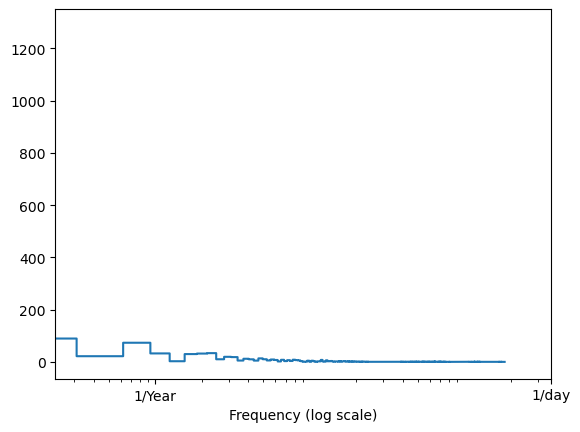

In [45]:
fft = tf.signal.rfft(data['AveragePrice'])
# f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(data['AveragePrice'])
day_per_year = 365.2524
years_per_dataset = n_samples_h/(day_per_year)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 4000)
# plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

# plt.stem(np.abs(fft)[:50])
# print("hi")
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.show()